# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [1]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

In [2]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [3]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [4]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

With k = 1, Total variance explained = 0.1640 (16.40%)
With k = 2, Total variance explained = 0.2973 (29.73%)
With k = 3, Total variance explained = 0.3990 (39.90%)
With k = 4, Total variance explained = 0.4696 (46.96%)
With k = 5, Total variance explained = 0.5083 (50.83%)
With k = 10, Total variance explained = 0.6522 (65.22%)
With k = 20, Total variance explained = 0.8090 (80.90%)
With k = 30, Total variance explained = 0.8985 (89.85%)
With k = 40, Total variance explained = 0.9509 (95.09%)
With k = 50, Total variance explained = 0.9821 (98.21%)


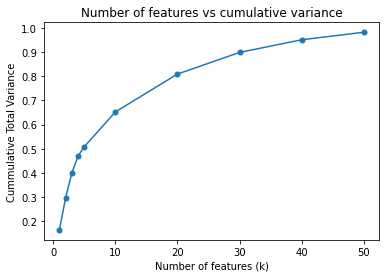

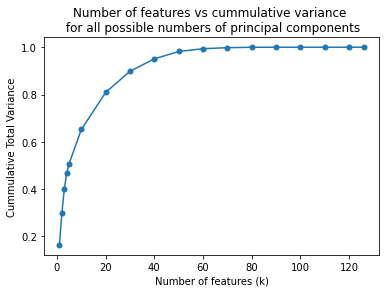

In [5]:
def P1():
    
    k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50]
    cum_variance = []
    
    #Calculating PCA
    pca = PCA()
    pca.fit_transform(train_data)
    
    for k in k_values:
        #Append the cummulative sum of the variance to the cum_variance list
        cum_variance_i = pca.explained_variance_ratio_.cumsum()[k-1]
        cum_variance.append(cum_variance_i)
        print(f'With k = {k}, Total variance explained = {cum_variance_i:.4f} ({cum_variance_i:.2%})')


    # Creating Plot
    fig, ax = plt.subplots()
    ax.margins(0.05)
    ax.plot(k_values, cum_variance, marker='o', ms=5, label="Cummulative Variance")
    plt.xlabel('Number of features (k)')
    plt.ylabel('Cummulative Total Variance')           
    plt.title("Number of features vs cumulative variance")
    plt.show()
    
    k_values = [1, 2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90,100, 110, 120, 126]
    cum_variance = []
    
    #Calculating PCA
    pca = PCA()
    pca.fit_transform(train_data)
    
    for k in k_values:
        #Append the cummulative sum of the variance to the cum_variance list
        cum_variance_i = pca.explained_variance_ratio_.cumsum()[k-1]
        cum_variance.append(cum_variance_i)


    #Plot
    fig, ax = plt.subplots()
    ax.margins(0.05)
    ax.plot(k_values, cum_variance, marker='o', ms=5, label="Cummulative Variance")
    plt.xlabel('Number of features (k)')
    plt.ylabel('Cummulative Total Variance')           
    plt.title("Number of features vs cummulative variance \n for all possible numbers of principal components")
    plt.show()
    
P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

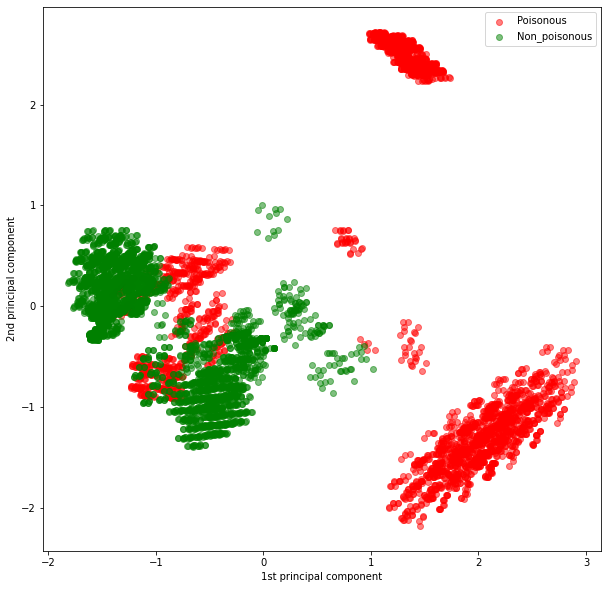

In [6]:
def P2(data, labels):

### STUDENT START ###
    # Use only first 2 principal components
    pca = PCA(n_components=2)
    # Transform the coordinates into a new 2-D space
    train_pca = pca.fit_transform(data)
    # define labels for poisonous and non-poisonous data
    poisonous = train_pca[np.where(labels == 1)]
    non_poisonous = train_pca[np.where(labels == 0)]

    plt.figure(figsize=(10,10))
    # plot each mushroom in the training set, with its corresponding color
    plt.scatter(poisonous[:,0], poisonous[:,1], c='r', label='Poisonous', alpha=0.5)
    plt.scatter(non_poisonous[:,0], non_poisonous[:,1], c='g', label='Non_poisonous', alpha=0.5)
    plt.xlabel("1st principal component")
    plt.ylabel("2nd principal component")
    plt.legend()
    return train_pca

### STUDENT END ###

transformed_train_data = P2(train_data, train_labels)


### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

Cluster =  6
	Cluster  0 co-ordinate is [-0.63 -0.83] with max distance 0.68
	Cluster  1 co-ordinate is [1.32 2.5 ] with max distance 0.48
	Cluster  2 co-ordinate is [ 2.28 -1.05] with max distance 1.33
	Cluster  3 co-ordinate is [-1.34  0.2 ] with max distance 0.85
	Cluster  4 co-ordinate is [ 1.75 -1.57] with max distance 0.72
	Cluster  5 co-ordinate is [-0.06 -0.17] with max distance 1.26


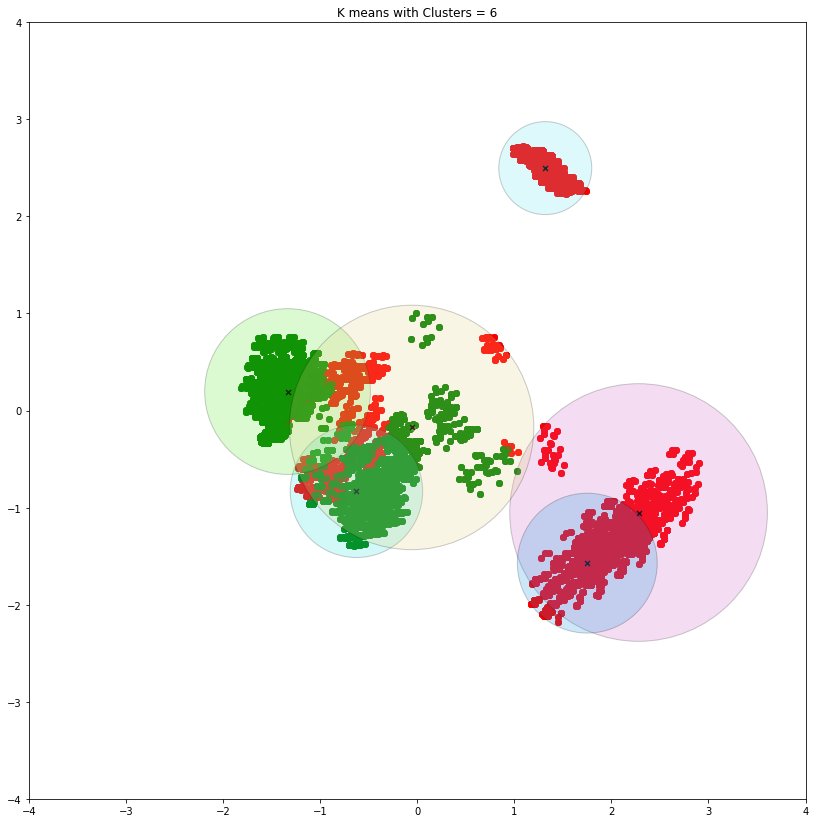

In [7]:
def P3(k):

### STUDENT START ###
    fig = plt.figure(figsize=(100, 100))
    colors = np.random.rand(k, 4)
    print ('Cluster = ', k)
    
    # initializing k-means
    km = KMeans(n_clusters=k, init='k-means++')
    clstrs = km.fit(transformed_train_data) # Getting centroids
    poisonous = transformed_train_data[np.where(train_labels == 1)]
    non_poisonous = transformed_train_data[np.where(train_labels == 0)]   
    
    dists = km.transform(transformed_train_data) # Getting distances
    cluster_assignment = km.predict(transformed_train_data)# Getting cluster assignments of the points
        
    ax = plt.subplot(k, 1, k, aspect='equal')
    title = 'K means with Clusters = ' + str(k)
    ax.set_title(title)
    for n in range(k):
        j = np.where(cluster_assignment == n)
        center = tuple(clstrs.cluster_centers_[n])
        radius = np.max(dists[j, n])
        print ('\tCluster {0:2d} co-ordinate is {1} with max distance {2}'.format(n, np.round(center, 2), np.round(radius, 2)))
            
        ax.axis([-4, 4, -4, 4])
        circle=plt.Circle(center, radius,color=colors[n], alpha=0.2)
        # To be able to differentiate between circles, make borders black
        circle.set_edgecolor('black')
        plt.scatter(center[0], center[1], color=colors[n])
        plt.scatter(poisonous[:,0], poisonous[:,1], c='r', label='Poisonous', alpha=0.5)
        plt.scatter(non_poisonous[:,0], non_poisonous[:,1], c='g', label='Non_poisonous', alpha=0.5)
        ax.add_artist(circle)
        # Plot the centroid of each cluster
    plt.scatter (clstrs.cluster_centers_[:,0], clstrs.cluster_centers_[:,1], marker = 'x', c = 'black', s = 25)
    #plt.legend()
### STUDENT END ###

P3(6)

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

<ipython-input-8-9ee3a8b590ba>:32: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), alpha=.3, cmap='hot')
<ipython-input-8-9ee3a8b590ba>:32: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), alpha=.3, cmap='hot')
<ipython-input-8-9ee3a8b590ba>:32: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), alpha=.3, cmap='hot')
<ipython-input-8-9ee3a8b590ba>:32: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), alpha=.3, cmap='hot')
<ipython-input-8-9ee3a8b590ba>:32: UserWarning: Log scale: values of z <= 0 have been masked
  CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), le

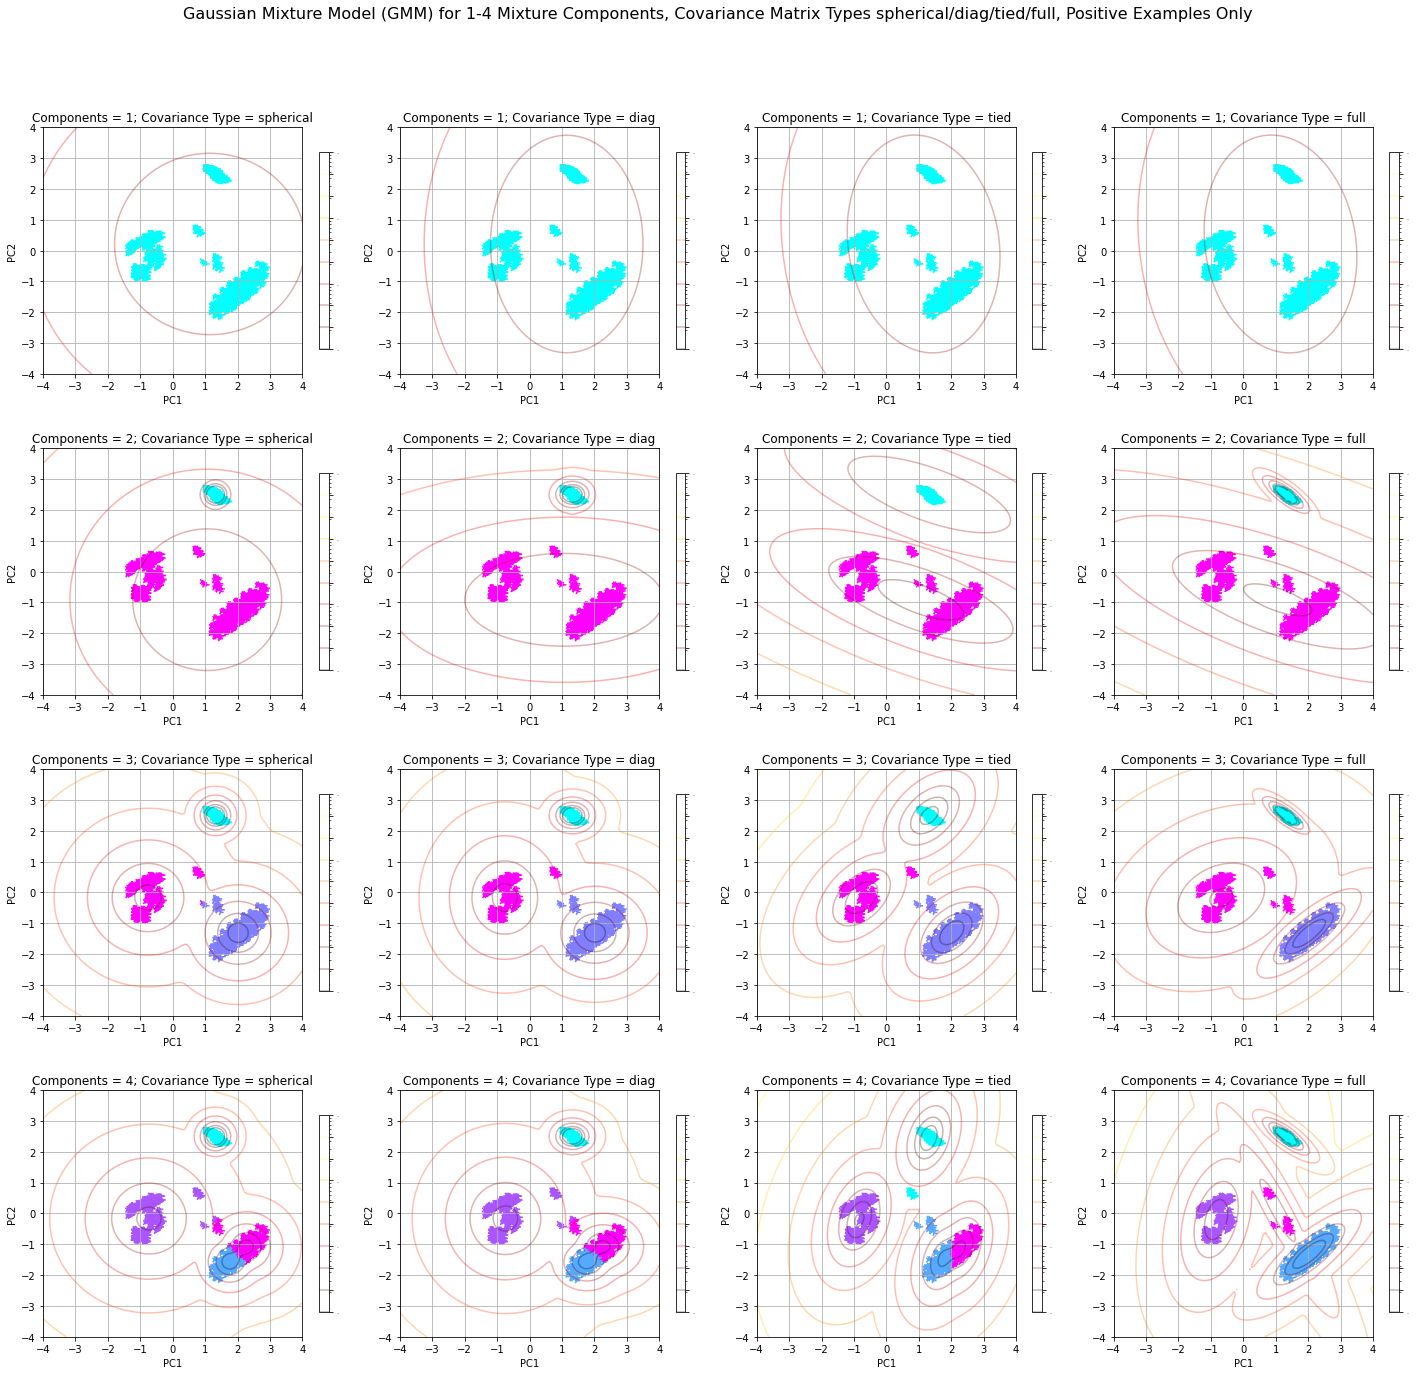

In [8]:
def P4():
### STUDENT START ###
    pca = PCA(n_components=2)
    poisonous = pca.fit_transform(train_data)[train_labels == 1]
    fig = plt.figure() #initializing plot
    fig.set_size_inches(25,21)
    fig.suptitle('Gaussian Mixture Model (GMM) for 1-4 Mixture Components, Covariance Matrix Types spherical/diag/tied/full, Positive Examples Only', size=16)
    count=1
    components = [1, 2, 3, 4]
    
    covariance_types = ['spherical', 'diag', 'tied', 'full']
    plt.subplots_adjust(left=0.125, bottom= 0.1, right=0.9, top=0.9, wspace=0.1, hspace=0.3)
    for component in components:
        for covar_type in covariance_types:
            gmm = GaussianMixture(n_components=component, covariance_type=covar_type, random_state=12345)
            gmm.fit(poisonous)
            
            y_hat = gmm.predict(poisonous)
            
            x = np.linspace(-4.0, 4.0, 100)
            y = np.linspace(-4.0, 4.0, 100)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            
            ax = fig.add_subplot(4, 4, count) #add to 4*4 grid
            ax.set_xlabel('PC1')
            ax.set_ylabel('PC2')
            count = count + 1 #add 1 to the count

            CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10), alpha=.3, cmap='hot')
            CB = plt.colorbar(CS, shrink=0.8)
            CB.ax.tick_params(labelsize=0) #removing labels on tick bar
            plt.title('Components = ' + str(component) + '; Covariance Type = ' + covar_type)
            plt.scatter(poisonous[:, 0], poisonous[:, 1], c=y_hat,marker="4",  cmap='cool')
            plt.title('Components = ' + str(component) + '; Covariance Type = ' + covar_type)
            plt.grid()
            plt.axis('tight')
### STUDENT END ###

P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [9]:
def P5(k):

### STUDENT START ###
    # Applying PCA to K prinicipal components
    pca = PCA(n_components=k)
    pca.fit(train_data)
    
    # Transform the coordinates into k-D space,
    transformed_train_data = pca.transform(train_data)
    transformed_test_data = pca.transform(test_data)
    
    poisonous = transformed_train_data[np.where(train_labels == 1)]
    non_poisonous = transformed_train_data[np.where(train_labels == 0)]

    gmm = GaussianMixture(n_components=4, covariance_type='full', random_state=12345)
    
    # create positive gmm
    gmm.fit(poisonous)
    gm_pos = gmm.score_samples(transformed_test_data) 

    # create negative gmm
    gmm.fit(non_poisonous)
    gm_neg = gmm.score_samples(transformed_test_data) 
    
    # Predict the type of mushroom after comparing probabilities
    predictions = np.where(gm_pos >= gm_neg, 1, 0)
    
    # print accuracy
    print ('THE ACCURACY IS {0:.2f}%'.format(100*metrics.accuracy_score(test_labels, predictions)))
### STUDENT END ###

P5(2)

THE ACCURACY IS 95.02%


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

The best accuracy of 96.98% was obtained using 3 GMM component with a tied covariance type, and 4 PCA components
Table with experiment results


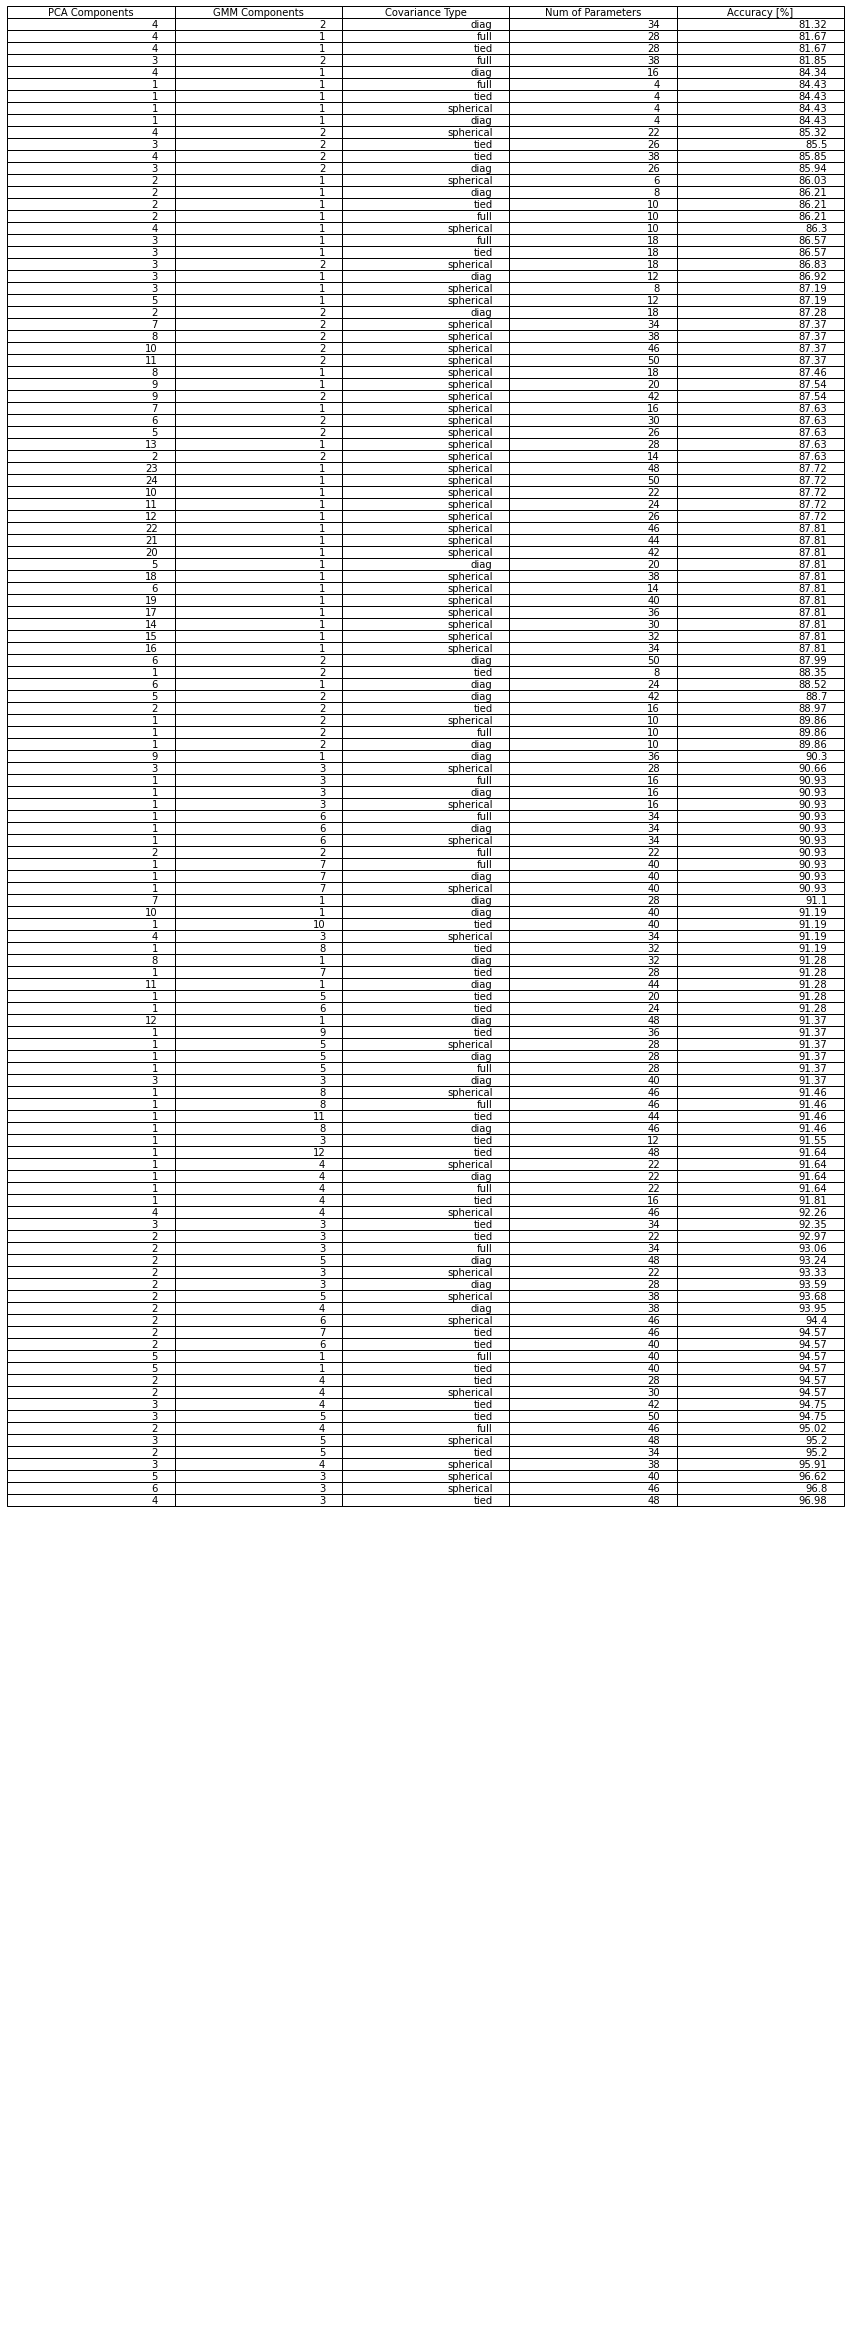

In [10]:
#Including component weights
# full = ((n_gmm - 1) +n_pca*n_gmm + n_pca (n_pca + 1)/ 2 * n_gmm) * n_classes
# diagonal = ((n_gmm - 1) +n_gmm + n_pca*n_gmm + n_pca * n_gmm) * n_classes
# spherical = ((n_gmm - 1) +n_pca*n_gmm + n_gmm) * n_classes
# tied = ((n_gmm - 1) +n_pca*n_gmm + n_pca (n_pca + 1)/ 2) * n_classes

def P6():

    #from P5()
    def gmm_accuracy(pca_comps=2, gmm_components=4, covar_type='full'):
        pca = PCA(n_components=pca_comps)
        pca.fit(train_data)
        pca_data = pca.transform(train_data)
        pca_test_data = pca.transform(test_data)

        #Split dataset
        poisonous = pca_data[np.where(train_labels == 1)]
        non_poisonous = pca_data[np.where(train_labels == 0)]
             
        gm_model = GaussianMixture(n_components = gmm_components, 
                              covariance_type=covar_type, 
                              random_state=12345)

        #Positive Model
        gm_model.fit(poisonous)
        #Score_samples gives the weighted log probabilities for each sample
        poisonous_score = gm_model.score_samples(pca_test_data)

        #Negative Model
        gm_model.fit(non_poisonous)
        non_poisonous_score = gm_model.score_samples(pca_test_data)

        #Check if prediction was correct
        predictions = (poisonous_score >= non_poisonous_score)

        #Calculate accuracy
        accuracy=np.sum(predictions == test_labels) / len(test_data)

        return accuracy
    
    def num_parameters(pca_comps=2, gmm_comps=4, covar_type='full', num_class=2):
        
        mean_vectors = pca_comps
        mean_params = pca_comps * gmm_comps
        comp_weights = gmm_comps - 1
        
        # covariance matrix from spreadsheet
        if covar_type == "full" or covar_type == "diag" or covar_type == "spherical":
            if covar_type == "full" :
                covar_mtx = (pca_comps * (pca_comps + 1)) / 2
                cov_params = gmm_comps * covar_mtx
                
            elif covar_type == "diag":
                covar_mtx = pca_comps
                cov_params = gmm_comps * covar_mtx
                
            elif covar_type == "spherical":
                covar_mtx = 1
                cov_params = gmm_comps * covar_mtx
            
        elif covar_type == "tied":
            covar_mtx = pca_comps * (pca_comps + 1) / 2
            cov_params = covar_mtx
                 
        parameters = int((mean_params + cov_params + comp_weights) * num_class)
        return parameters

    columns = ['PCA Components', 'GMM Components', 'Covariance Type', "Num of Parameters", "Accuracy [%]"]
    gmm_trials = []
    
    num_class = 2
    max_pca_comps = 25
    max_gmm_comps = 25
    covar_types = ['full', 'diag', 'spherical', 'tied']
    
    for pca_comps in range(1, max_pca_comps):
        for gmm_comps in range(1, max_gmm_comps):
            for covar_type in covar_types:
                parameters = num_parameters(pca_comps, gmm_comps, covar_type, num_class)
                if parameters <= 50:
                    accuracy = gmm_accuracy(pca_comps, gmm_comps, covar_type)
                    gmm_trials.append([pca_comps, gmm_comps, covar_type, parameters, round(accuracy*100, 2)])
                    

    #GMM Trial results, sort, and construct for table plot
    gmm_trials = np.array(gmm_trials)
    gmm_trials = gmm_trials[gmm_trials[:,4].argsort()]
    
    concat_var = (f'The best accuracy of {gmm_trials[-1,4]}% was obtained using'
                  f' {gmm_trials[-1,1]} GMM component with a {gmm_trials[-1,2]} covariance type,'
                  f' and {gmm_trials[-1,0]} PCA components')
    print(concat_var)

    print(f'Table with experiment results')
    
    #Print and plot accuracies of the experiments
    plt.figure(figsize=(15, 15))
    ax = plt.gca()
    ax.axis('off')
    plt.table(cellText=gmm_trials, colLabels=columns, loc="top")
    plt.show()
    
P6()